## CPSC-483-02 Assignment 4
## Name : Mohit Kumar
## Name : Ishee Gattani

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy.linalg import inv
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score

## Question1 Load and examine the California dataset’s features, target values, and description.

In [44]:
# Loadind California House pricing data
cal_housing = fetch_california_housing()
# feature data to X
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
# target data to Y
Y = pd.DataFrame(cal_housing.target,columns=['MedHouseVal'])


In [45]:
# describe The data set 
X.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [46]:
# Shape of data
X.shape, Y.shape

((20640, 8), (20640, 1))

In [47]:
# few head instances of the feature data
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [48]:
# few head instance of the target data
Y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


## Question 2 Recall that when we originally discussed housing prices, we suggested that the price of a house might depend on how many bedrooms it has. Create and fit() an sklearn.linear_model.LinearRegression model using AveBedrms as a predictor of MedHouseVal. How well does the model score()?

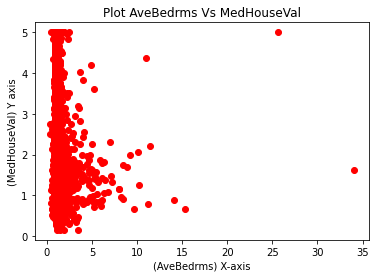

In [49]:
plt.scatter(X.AveBedrms, Y.MedHouseVal, c='r')
plt.xlabel('(AveBedrms) X-axis')
plt.ylabel('(MedHouseVal) Y axis')
plt.title('Plot AveBedrms Vs MedHouseVal');

In [50]:
# Selecting LSTAT and MEDV 
X_AveBedrms = X['AveBedrms'].values.reshape(-1,1)
y_MedHouseVal = Y['MedHouseVal'].values.reshape(-1,1)


In [51]:
# Fitting Linear Regression model on all the Data available
Lregressor = LinearRegression()
Lregressor.fit(X_AveBedrms, y_MedHouseVal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Mean Squared Error on all the instances of Datasetusing AveBedrms feature: 1.3286462715511391


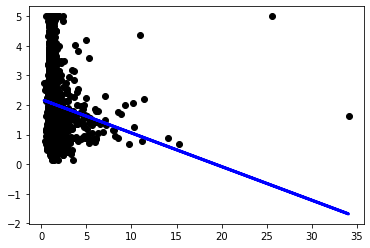

In [52]:
# Prediction on all the instanes
y_pred = Lregressor.predict(X_AveBedrms)

print('Mean Squared Error on all the instances of Datasetusing AveBedrms feature:', metrics.mean_squared_error(y_MedHouseVal, y_pred))

plt.scatter(X_AveBedrms, y_MedHouseVal,  color='black')
plt.plot(X_AveBedrms, y_pred, color='blue', linewidth=3)
plt.show()

In [53]:
r2 = r2_score(y_MedHouseVal, y_pred)
print('R2 score is {}'.format(r2))

R2 score is 0.0021809379116133343


### Linear regresion model isnt a good fit as the score value is very low from 1. It is not a good model

## Ques 3: Let’s take a closer look at the data. Seaborn’s pairplot() function can be used to plot pairs of features against each other. Plot MedHouseVal as a function of each of the features.

In [54]:
cal=X
cal['MedHouseVal'] = Y['MedHouseVal']

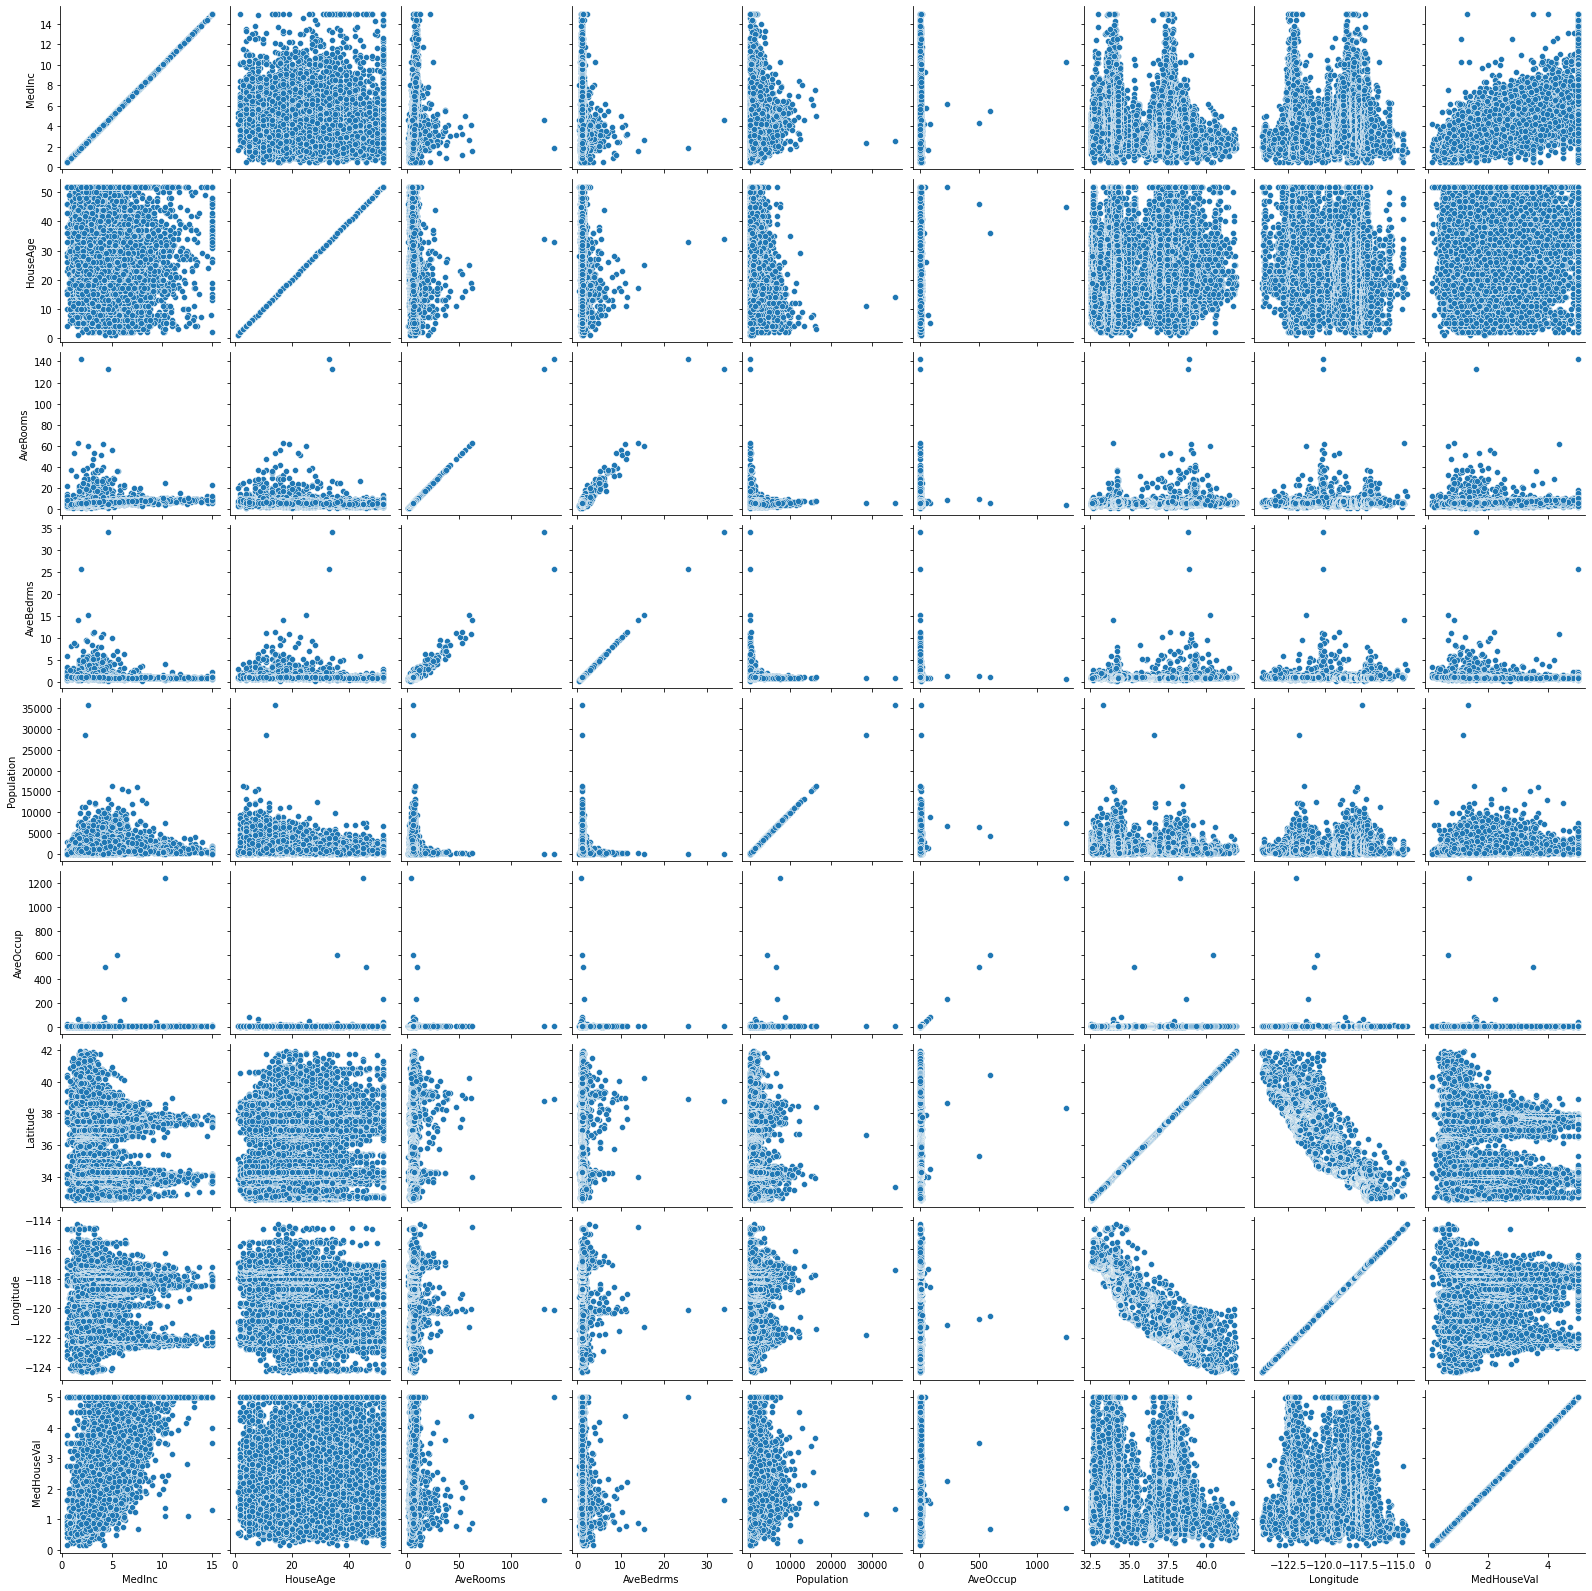

In [55]:
sns.pairplot(X, diag_kind = None)


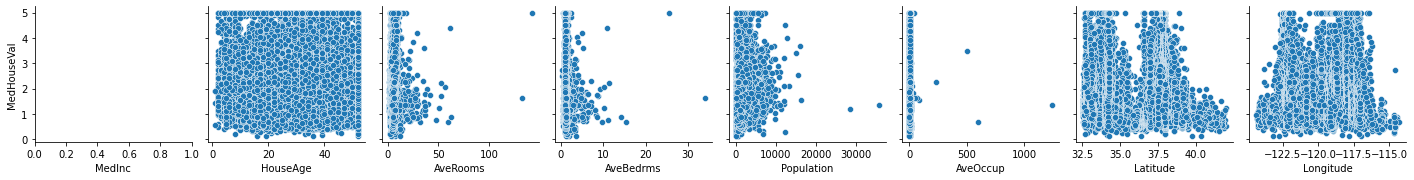

In [56]:
sns.pairplot(
    cal,
    x_vars=["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"],
    y_vars=["MedHouseVal"],
)

## Question 4: Because of the size of the dataset, graphs produced by Seaborn are rather crowded. Try the plot again using a sample() of 1%. How does the distribution of AveBedrms seem to affect MedHouseVal?

In [57]:
a=cal.sample(frac=0.1,random_state=0)

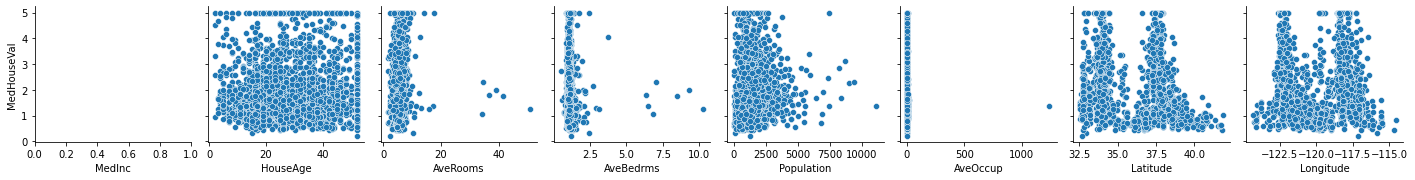

In [58]:
sns.pairplot(
    a,
    x_vars=["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"],
    y_vars=["MedHouseVal"],
)

### Answer AveBedrms less than equal to 2 are more likely to be considered 

## Question 5:Which features seem to have a linear relationship with MedHouseVal?
## Answer: MedInc and MedhouseVal having linear relationship 

## Quetion 6: What interesting relationship do you see between MedHouseVal and the Latitude and Longitude? Look these values up on a map of the state.(If you are feeling particularly ambitious, you might try plotting the values on a map.)
## Answer: 

## After looking in detail the map of the state we come to a conclusion that Med House val is saturated near latitudes 33 and 37 and longitudes 122 and 117 at OakLand, San Jose, San Fransisco and Los Angeles
                

## Question 7: Recall that the covariance matrix shows how pairs of features in a dataset co-vary. What patterns (if any) do you observe? (Hint: use describe() to examine distribution of the features before attempting to interpret the results.)Recall that the covariance matrix shows how pairs of features in a dataset co-vary. What patterns (if any) do you observe? (Hint: use describe() to examine distribution of the features before attempting to interpret the results.)

In [59]:
cov_matrix = cal.cov()
cov_matrix['MedHouseVal'].sort_values(ascending=False)
cov_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765,1.508475
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244,1.533988
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518,0.433826
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670,-0.025539
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839,-32.212487
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519,-0.284494
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054,-0.355326
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139,-0.106274
MedHouseVal,1.508475,1.533988,0.433826,-0.025539,-3.221249e+01,-0.284494,-0.355326,-0.106274,1.331615


In [60]:
cov_matrix.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,1.571335,-452.347408,-21.968864,-3.866784,1.420859e+05,103.482335,-29.136235,24.830035,-3.130691
std,3.741177,1414.705738,67.693605,11.878966,4.276467e+05,271.678216,87.776951,75.612004,10.932992
min,-2.846140,-4222.270582,-202.333712,-35.527225,-4.222271e+03,-0.284494,-263.137814,-3.957054,-32.212487
25%,-0.057765,-2.846140,-0.136518,-0.055858,-2.023337e+02,-0.030424,-0.355326,-0.136518,-0.284494
50%,0.370289,-0.463718,0.433826,-0.025539,-3.221249e+01,0.052492,0.052492,-0.057765,-0.025539
75%,1.536568,1.533988,0.993868,0.070575,2.263778e+02,1.724298,0.300346,0.051519,1.331615
max,10.400979,158.396260,6.121533,0.993868,1.282470e+06,821.712002,4.562293,226.377839,1.533988


### Answer MedInc and HouseAge seems to be better feature to predict the MedHouseVal

## Question 8: Covariance is difficult to interpret because the features are on very different scales. While you could standardize the features yourself, the correlation matrix is the covariance matrix of the standardized variables. Based on the correlation matrix, which features is the best predictor of MedHouseVal?

In [61]:
corr_matrix = cal.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)
corr_matrix


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### Answer: MedInc is the best predictor of MedHouseVal

## Question 9: Repeat experiment (2) using the feature you found in experiment (8) instead of AveBedrms. How well does this model score?

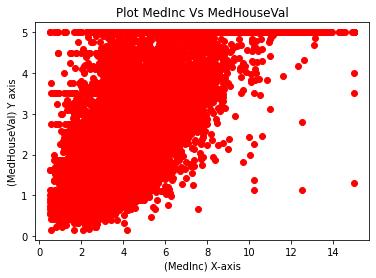

In [62]:
plt.scatter(X.MedInc, Y.MedHouseVal, c='r')
plt.xlabel('(MedInc) X-axis')
plt.ylabel('(MedHouseVal) Y axis')
plt.title('Plot MedInc Vs MedHouseVal');



In [63]:
X_MedInc = X['MedInc'].values.reshape(-1,1)
y_MedHouseVal = Y['MedHouseVal'].values.reshape(-1,1)

In [64]:
Lregressor = LinearRegression()
Lregressor.fit(X_MedInc, y_MedHouseVal)
# Prediction on all the instanes
y_pred = Lregressor.predict(X_MedInc)

print('Mean Squared Error on all the instances of Datasetusing AveBedrms feature:', metrics.mean_squared_error(y_MedHouseVal, y_pred))



Mean Squared Error on all the instances of Datasetusing AveBedrms feature: 0.7011311502929527


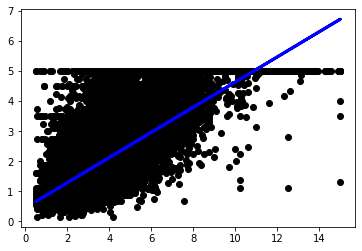

In [65]:
plt.scatter(X_MedInc, y_MedHouseVal,  color='black')
plt.plot(X_MedInc, y_pred, color='blue', linewidth=3)
plt.show()

In [66]:
r2 = r2_score(y_MedHouseVal, y_pred)
print('R2 score is ',r2)

R2 score is  0.47344749180719903


### Answer r2 score improve significantly (MSE reduced too) as compared to question 2 which uses AveBedrms so MedInc is better prediction of MedHouseVal.

## Question 10: Another way to visualize the predictive value of the two features is to compare the variance. The seaborn.regplot() function can be used to create a scatter plot, add a regression line, and plot a 95% confidence interval in a single step. (Recall that 95% corresponds to ±2𝜎.) Plot AveBedrms as a predictor of MedHouseVal, then use the feature you found in experiment (8). What difference do you see? (Don’t forget to use the sample you created in experiment (4), or your graph will be difficult to interpret.)

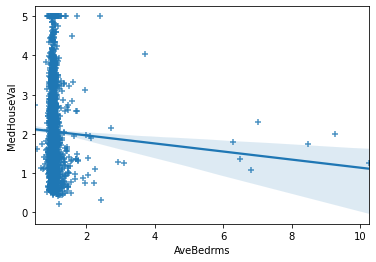

In [67]:
ax = sns.regplot(x=a["AveBedrms"], y=a["MedHouseVal"], marker="+")

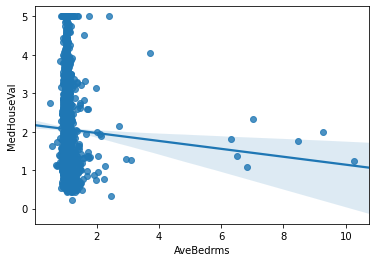

In [68]:
ax = sns.regplot(x=a["AveBedrms"], y=a["MedHouseVal"], ci=95, truncate=False)

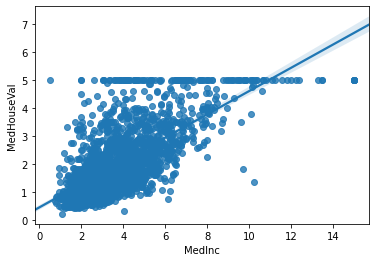

In [69]:
bx = sns.regplot(x=a["MedInc"], y=a["MedHouseVal"], ci=95, truncate=False)

### Answer MedInc and MedhouseVal varies linearly as compare to other one

## Question 11: Other than the feature you found in experiment (8), there is only a very weak relationship between MedHouseVal and the other features. Fit and score a model to predict MedHouseVal using all the features. Are you surprised by the result? What accounts for the difference from experiment (9)?

In [70]:
# Fitting Linear Regression model on all the Data available
Lregressor = LinearRegression()
X_All = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
Lregressor.fit(X_All,y_MedHouseVal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred = Lregressor.predict(X_All)

print('Mean Squared Error on all the instances of Datasetusing all feature:', metrics.mean_squared_error(y_MedHouseVal, y_pred))


Mean Squared Error on all the instances of Datasetusing all feature: 0.5243209861846072


In [72]:
r2 = r2_score(y_MedHouseVal, y_pred)
print('R2 score is ',r2)

R2 score is  0.606232685199805


### ANSWER  As we can see that R2 score improved (MSE reduced too) so considering all features are better predictor of MedHouseVal rather than just using MedInc as we did in question 9. Also we are suprised by the result as the positively and negatively co vary with all features provide better results in terms of prediction rather than just using Medinc in question 9